In [161]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [162]:
df=pd.read_csv("hotel_bookings.csv")

In [163]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


# Data Cleaning/Preprocessing

Checking for Null Values

In [164]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [165]:
#Drop company column because there are too many null values
df.drop(['company'], axis=1, inplace=True)

In [166]:
#Drop rows that have missing Country data. We don't want to delete the whole column becasue there aren't a lot of null values and it's an important variable.
df.dropna(subset=['country'],inplace=True)

In [167]:
#Similar to previous cell
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)

In [168]:
#There aren't a ton of null values for agent but we can delete it because we won't be using this variable in the analysis anyways.
df.drop(['agent'], axis=1, inplace=True)

In [169]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Check for Duplicate Data

In [170]:
df.duplicated().sum()

31984

In [171]:
#Drop Duplciates
df.drop_duplicates(keep = 'first', inplace = True)

In [172]:
df.duplicated().sum()

0

Check and Change Data Types

In [173]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [174]:
#Changing children column to int
df['children']=df['children'].astype('int64')


 adding useful columns

In [175]:
#add total family size column and total stay column
df['total_family_size']=df['adults']+df['children']+df['babies']
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7


# Exploratory Analysis

Busiest Months by Hotel Type

Text(0.5, 1.0, 'Busiest Months by Hotel Type')

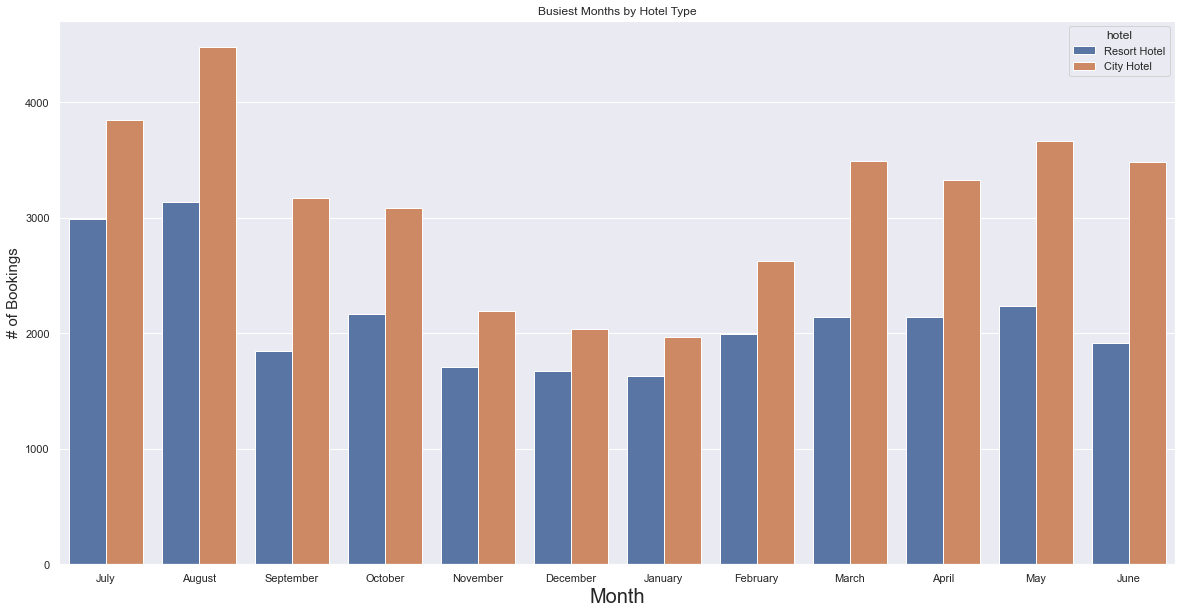

In [176]:
sns.countplot(x ='arrival_date_month',hue='hotel', data = df[(df['is_canceled'] == 0)])
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Month', fontsize=20)
plt.ylabel('# of Bookings', fontsize=15)
plt.title("Busiest Months by Hotel Type")

Insights: Both hotels follow a similar pattern of being busier in the summer months. Also, the city hotel is busier than the resort hotel.

Most Frequent origins of customers

''

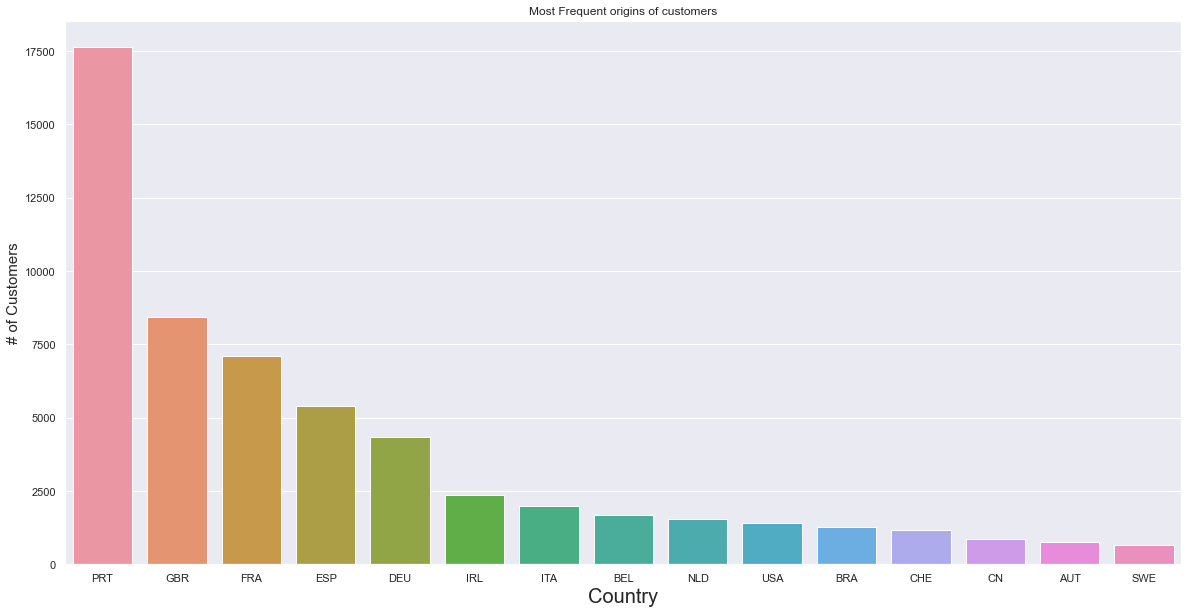

In [177]:
#top 10 countries

top_countries = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
top_countries.columns =['Country','Customer_Count']
top_countries = top_countries[:15]
top_countries
sns.barplot( data=top_countries, x=top_countries.Country, y=top_countries.Customer_Count) 
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('# of Customers', fontsize=15)
plt.title("Most Frequent origins of customers")
;
   

Insight: Both hotels are in Portugal which is the reason the majority of their customers are from Portugal.

In [178]:
top_countries

,Country,Customer_Count
0,PRT,17653
1,GBR,8446
2,FRA,7104
3,ESP,5388
4,DEU,4332
5,IRL,2348
6,ITA,1990
7,BEL,1670
8,NLD,1561
9,USA,1416


Most Frequent origins of customers by hotel

In [179]:
#create temp df for customers who didn't cancel
temp = df[(df['is_canceled']==0)]


In [180]:
#Create list for top 15 countries for simplicity
top_countries_list=top_countries.Country.unique()
top_countries_list

array(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD',
       'USA', 'BRA', 'CHE', 'CN', 'AUT', 'SWE'], dtype=object)

In [181]:
#This df holds only country values that are in the top_countries_list
Origins_by_HotelType = temp[temp['country'].isin(top_countries_list)]

Text(0.5, 1.0, 'Most Frequent origins of customers by hotel')

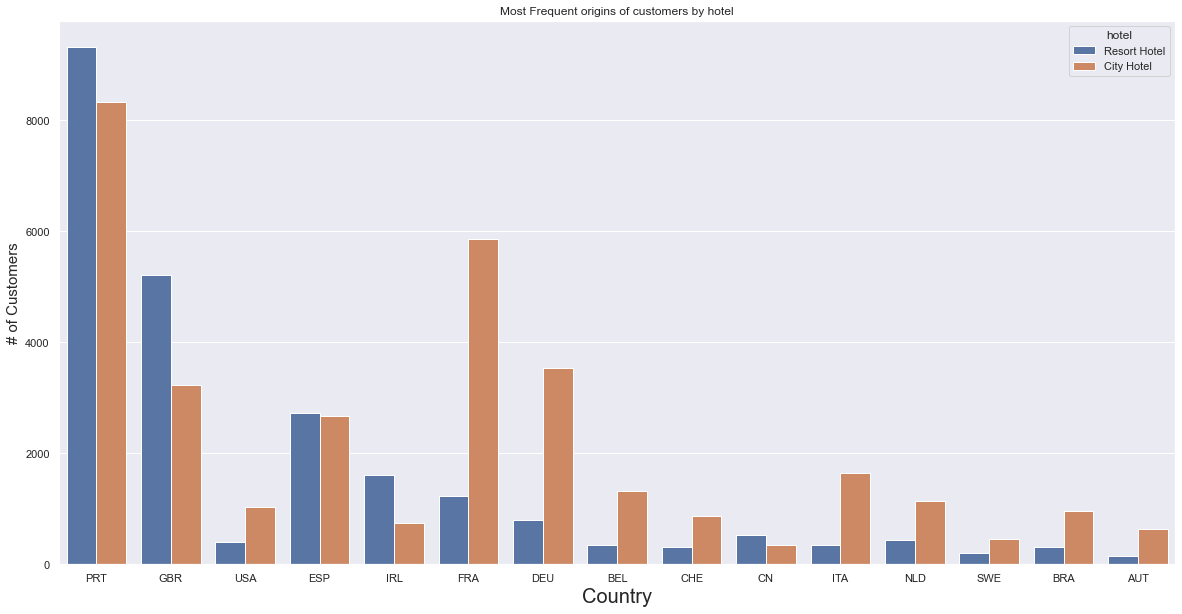

In [182]:
sns.countplot(x ='country',hue='hotel', data = Origins_by_HotelType)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('# of Customers', fontsize=15)
plt.title("Most Frequent origins of customers by hotel")

Insight: A good amount of the city hotel's customers are from France and Germany, unlike the Resort hotel. This could be because the city hotel is presumably used for more business-related travelers.

Basic Comparison of City and Resort Hotels

 Average Daily Rate

In [183]:
df[(df['is_canceled']==0)].groupby('hotel')['adr'].describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,108.287217,42.612880,0.00,80.75,102.0,130.5,510.0
Resort Hotel,25566.0,93.508042,60.819528,-6.38,49.00,75.0,123.5,508.0


Insight: City hotel guests pay a slighty higher daily rate, on average.

Total Stay

In [184]:
df[(df['is_canceled']==0)].groupby('hotel')['total_stay'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,2.991757,1.860539,0.0,2.0,3.0,4.0,57.0
Resort Hotel,25566.0,4.228546,3.403255,0.0,2.0,3.0,7.0,56.0


Insight: It is typical for guests to stay longer at the resort hotel, on average. This is probably because the resort hotel is used typically for vacations, in speculation.

Family Size

In [185]:
df[(df['is_canceled']==0)].groupby('hotel')['total_family_size'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37365.0,1.976582,0.705980,0.0,2.0,2.0,2.0,12.0
Resort Hotel,25566.0,1.985606,0.675887,0.0,2.0,2.0,2.0,5.0


Inisght: No difference in family size per reservation between hotels.

In [186]:
#To add - heatmap split by hotel
#cancellation stats

Popular Rooms by Hotel(Number of stays)

In [187]:
popular_rooms=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel']).size().unstack()
popular_rooms

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,27134.0,14371.0
B,678.0,3.0
C,9.0,609.0
D,7088.0,5047.0
E,1013.0,3353.0
F,1079.0,886.0
G,364.0,940.0
H,NaN,353.0
L,NaN,4.0


Insight:Room A was the most popular for both hotels, while each hotel had varying unpopular rooms. This data could also be atrributed to number of rooms per type and availability.

Text(0.5, 1.0, 'Popular Rooms by Hotel(Number of stays)')

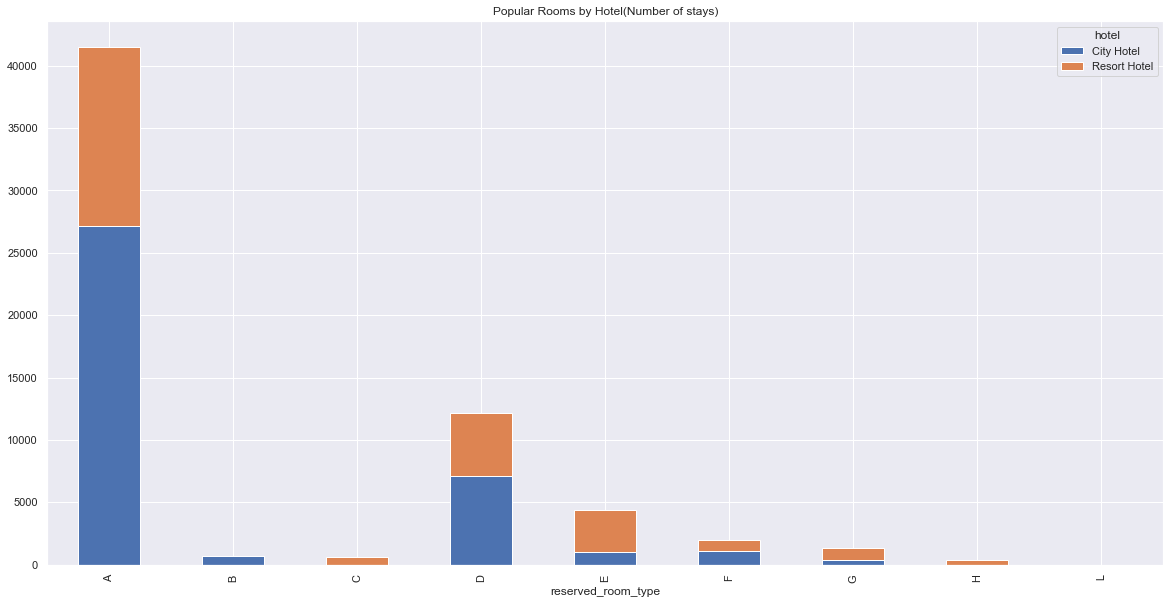

In [188]:
popular_rooms.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Popular Rooms by Hotel(Number of stays)")

Insight: Similar demand for rooms between hotels

Most expensive rooms at each hotel

In [189]:
Average_Room_Prices=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel'])['adr'].mean().unstack()
Average_Room_Prices

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,97.576187,75.448693
B,87.501711,104.666667
C,68.111111,154.899934
D,128.774721,101.286729
E,153.648618,110.077304
F,184.886580,130.060621
G,194.193791,161.174021
H,NaN,181.531898
L,NaN,151.000000


Insight: Based on the data, room A is the cheapest for both hotels, which probably explains why it is the most popular. While, rooms like G and F are more expensive which probably explains why they are stayed at less than A. 

Text(0.5, 1.0, 'Most expensive rooms at each hotel')

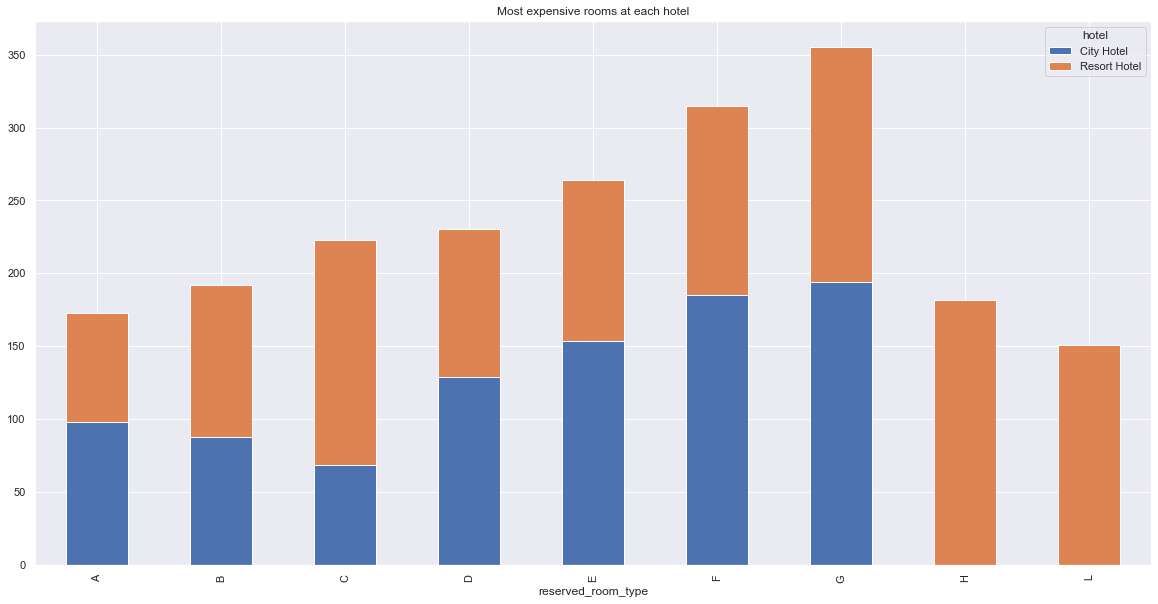

In [190]:
Average_Room_Prices.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Most expensive rooms at each hotel")

Insights: For the city hotel, room 'G' is most expensive on average, while room 'H' is most expenseive for the resort hotel.

**Cancellation Analysis

Which customers were most likely to cance;(based on country)

In [191]:
#First I find the top 15 most frequent custmer origins to make findings more useful to the hotels. Then create a new df.
Most_Frequent_Origins = df['country'].value_counts().reset_index()
Most_Frequent_Origins.columns =['Country','Customer_Count']
Most_Frequent_Origins = Most_Frequent_Origins[:15]
Most_Frequent_Origins_List = Most_Frequent_Origins.Country.unique()
Most_Frequent_Origins_DF = df[df['country'].isin(Most_Frequent_Origins_List)]
Most_Frequent_Origins_DF

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7


In [192]:
#Then I find % of cancellations grouped by country
Cancellations_By_Country = round(Most_Frequent_Origins_DF.groupby('country')['is_canceled'].value_counts(normalize=True)*100,2).unstack()
Cancellations_By_Country

is_canceled,0,1
country,,
AUT,82.03,17.97
BEL,80.25,19.75
BRA,63.52,36.48
CHE,75.54,24.46
CN,79.41,20.59
DEU,80.45,19.55
ESP,74.32,25.68
FRA,80.39,19.61
GBR,80.97,19.03


Insight:Guests from Brazil, Italy, Portugal are most likely to cancel their reservations. While guests from Austria, Belgium, Germany, France, Netherlands, and the Untied Kingdom are least likely to cancel.

Which resort experiences the most cancellations?

In [193]:
Resort_Type_Cancellations = round(df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100,2)
Resort_Type_Cancellations

hotel         is_canceled
City Hotel    0              69.97
              1              30.03
Resort Hotel  0              76.29
              1              23.71
Name: is_canceled, dtype: float64

Insight: Guests who book stays at the city hotel are about 7% more likely to cancel than guests who book stays at the resort hotel.

Corr Heatmap

<AxesSubplot:>

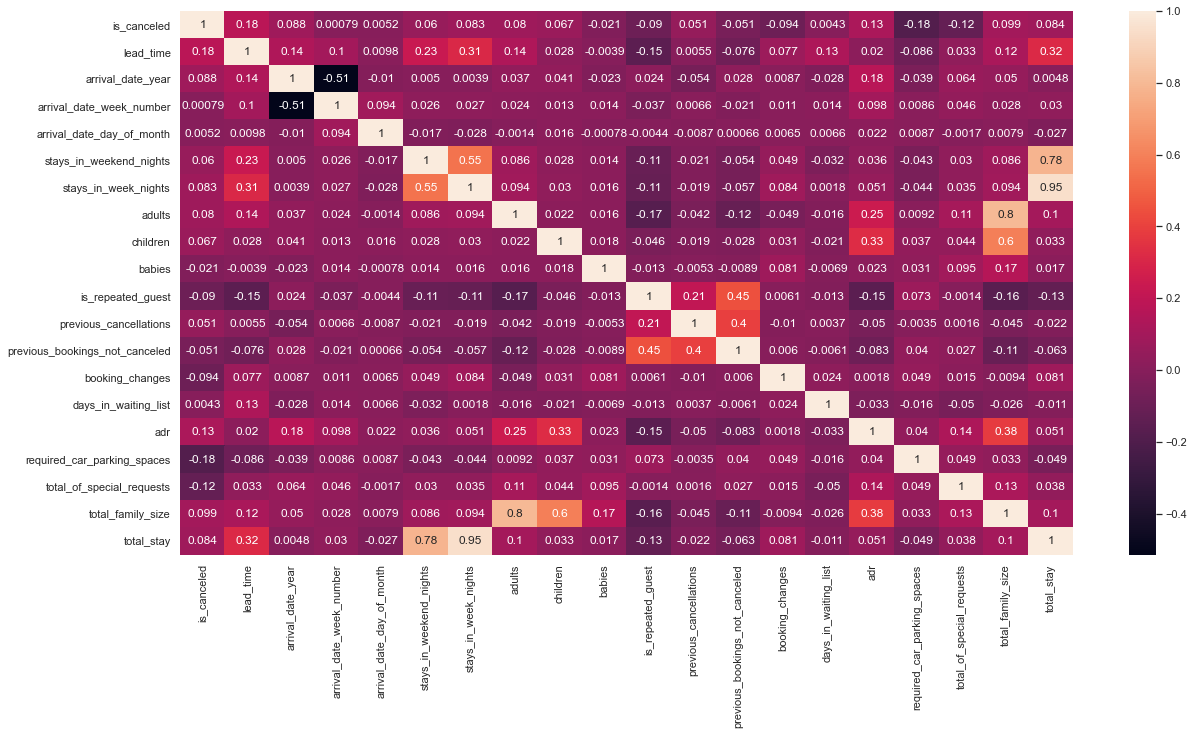

In [194]:
sns.heatmap(df.corr(), annot=True)

Corr of all varriables with 'is_canceled'

In [195]:
df.corr()['is_canceled'].abs().sort_values(ascending=True)

arrival_date_week_number          0.000795
days_in_waiting_list              0.004297
arrival_date_day_of_month         0.005227
babies                            0.020950
previous_bookings_not_canceled    0.050567
previous_cancellations            0.050964
stays_in_weekend_nights           0.059596
children                          0.067010
adults                            0.080216
stays_in_week_nights              0.082778
total_stay                        0.083866
arrival_date_year                 0.087745
is_repeated_guest                 0.090171
booking_changes                   0.094074
total_family_size                 0.098807
total_of_special_requests         0.121825
adr                               0.126671
lead_time                         0.183683
required_car_parking_spaces       0.183751
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Corr of all varriables with 'adr'

In [196]:
df.corr()['adr'].abs().sort_values(ascending=True)

booking_changes                   0.001780
lead_time                         0.019698
arrival_date_day_of_month         0.022164
babies                            0.022779
days_in_waiting_list              0.033459
stays_in_weekend_nights           0.035921
required_car_parking_spaces       0.040467
previous_cancellations            0.050240
stays_in_week_nights              0.050859
total_stay                        0.051267
previous_bookings_not_canceled    0.082906
arrival_date_week_number          0.097733
is_canceled                       0.126671
total_of_special_requests         0.136239
is_repeated_guest                 0.154557
arrival_date_year                 0.176021
adults                            0.245238
children                          0.326300
total_family_size                 0.384372
adr                               1.000000
Name: adr, dtype: float64

# Removing useless variables/ Feature Selection and engineering

In [118]:
df.drop(['arrival_date_week_number','days_in_waiting_list', 'arrival_date_year'], axis=1, inplace=True)



In [119]:
df.drop(['arrival_date_month'], axis=1, inplace=True)
df.drop(['arrival_date_day_of_month'], axis=1, inplace=True)
df.drop(['reservation_status'], axis=1, inplace=True)
df.drop(['assigned_room_type'], axis=1, inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'total_family_size', 'total_stay'],
      dtype='object')


In [120]:
#Splitting reservation_status_date for easier manipulation

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [121]:
df.drop(['reservation_status_date'], axis=1, inplace=True)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_family_size                   int64
total_stay                        

In [122]:
#Minimizing the # of unique values in the country column which will be beneficial when creating dummy vars
df['country'].nunique()
df.loc[~df["country"].isin(top_countries_list), "country"] = "Other"
df['country'].value_counts()
df['country'].nunique()

16

In [123]:
df['deposit_type'].nunique()
df['meal'].nunique()
df['customer_type'].nunique()
df['reserved_room_type'].nunique()

10

Creating Dummy Variables for Required Variables

In [124]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_family_size                   int64
total_stay                        

In [125]:
dummies = pd.get_dummies(df, columns=['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'])
dummies

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2,5,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [126]:
dummies.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_family_size'], axis=1, inplace=True)


In [127]:
dummies

,is_canceled,is_repeated_guest,year,month,day,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,2015,7,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,2015,7,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2015,7,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,2015,7,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,2015,7,3,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2017,9,6,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,0,2017,9,7,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


checking variance of numeric data to see if we need to normalize values

In [128]:
df.var().sort_values(ascending=False).head(30)

lead_time                         7413.709808
adr                               3020.557642
day                                 77.307364
month                               10.418653
total_stay                           7.553911
stays_in_week_nights                 4.177363
previous_bookings_not_canceled       2.952003
stays_in_weekend_nights              1.058473
total_of_special_requests            0.692024
total_family_size                    0.630246
booking_changes                      0.530242
year                                 0.462696
adults                               0.391727
children                             0.208710
is_canceled                          0.199799
previous_cancellations               0.136626
required_car_parking_spaces          0.078646
is_repeated_guest                    0.037706
babies                               0.012885
dtype: float64

In [129]:
#normalize_columns =['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']
normalized_df =df.loc[:, ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']] 

Normalizing Numeric Columns

In [130]:
final_normalized_df= (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())

In [131]:
final_normalized_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0.464043,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,1.000000,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0.009498,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0.017639,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0.018996,0.000,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0.138399,0.125,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0.046133,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0.147897,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


In [132]:
Final_df = pd.merge(dummies,final_normalized_df , left_index=True, right_index=True)
Final_df

,is_canceled,is_repeated_guest,year,month,day,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,...,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,2015,7,1,0,1,1,0,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,0,0,2015,7,1,0,1,1,0,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0,0,2015,7,2,0,1,1,0,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0,0,2015,7,2,0,1,1,0,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0,0,2015,7,3,0,1,1,0,0,...,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2017,9,6,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0,0,2017,9,7,1,0,1,0,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


# Logistic Regression Model

In [133]:
#defining independent, dependent data sets

Y= Final_df['is_canceled']
X = Final_df.drop(['is_canceled'], axis=1)

In [134]:
#creating train/test sets

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.3)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=10000)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)


In [136]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     18884
           1       0.67      0.36      0.47      7191

    accuracy                           0.78     26075
   macro avg       0.73      0.65      0.66     26075
weighted avg       0.76      0.78      0.75     26075



**The model was 77% accurate in predicting if a customer will cancel their reservation.

*In the process of refining model